# Analysis

Fast notebook with some tables and plots to understand better how the algorithm
behaves on different datasets and with different parallel backends.

In [1]:
import pandas as pd

df = pd.read_csv("../results/cluster_breast_cancer_1.csv")
# df = df[df["estimators"] != 256]
df

,estimators,max_depth,backend,threads,nodes,dataset,train_accuracy,train_f1,test_accuracy,test_f1,train_time,train_predict_time,test_predict_time
0,32,0,ff,1,1,breast_cancer,1.0,1.0,0.955752,0.948660,226.03020,1.435664,0.721314
1,32,0,ff,2,1,breast_cancer,1.0,1.0,0.955752,0.948660,123.14900,1.111970,0.634200
2,32,0,ff,4,1,breast_cancer,1.0,1.0,0.955752,0.948660,62.95184,1.245160,1.026527
3,32,0,ff,8,1,breast_cancer,1.0,1.0,0.955752,0.948660,32.79872,2.233218,2.122102
4,32,0,ff,16,1,breast_cancer,1.0,1.0,0.955752,0.948660,19.08386,5.266618,5.134266
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,256,0,omp,4,1,breast_cancer,1.0,1.0,0.964602,0.958608,477.83000,1.546978,0.423017
144,256,0,omp,8,1,breast_cancer,1.0,1.0,0.964602,0.958608,245.85640,0.971122,0.287621
145,256,0,omp,16,1,breast_cancer,1.0,1.0,0.964602,0.958608,126.21580,0.662846,0.234895
146,256,0,omp,32,1,breast_cancer,1.0,1.0,0.964602,0.958608,95.20178,0.601660,0.226908


In [2]:
seq = df[df["backend"] == "seq"]

keys = ["estimators", "max_depth", "dataset"]
merged = seq.merge(df, how="right", on=keys, suffixes=("_seq", "_mt"))

df["train_speedup"] = merged["train_time_seq"] / merged["train_time_mt"]
df["train_efficiency"] = df["train_speedup"] / merged["threads_mt"]

df

,estimators,max_depth,backend,threads,nodes,dataset,train_accuracy,train_f1,test_accuracy,test_f1,train_time,train_predict_time,test_predict_time,train_speedup,train_efficiency
0,32,0,ff,1,1,breast_cancer,1.0,1.0,0.955752,0.948660,226.03020,1.435664,0.721314,0.977209,0.977209
1,32,0,ff,2,1,breast_cancer,1.0,1.0,0.955752,0.948660,123.14900,1.111970,0.634200,1.793590,0.896795
2,32,0,ff,4,1,breast_cancer,1.0,1.0,0.955752,0.948660,62.95184,1.245160,1.026527,3.508695,0.877174
3,32,0,ff,8,1,breast_cancer,1.0,1.0,0.955752,0.948660,32.79872,2.233218,2.122102,6.734373,0.841797
4,32,0,ff,16,1,breast_cancer,1.0,1.0,0.955752,0.948660,19.08386,5.266618,5.134266,11.574116,0.723382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,256,0,omp,4,1,breast_cancer,1.0,1.0,0.964602,0.958608,477.83000,1.546978,0.423017,3.734839,0.933710
144,256,0,omp,8,1,breast_cancer,1.0,1.0,0.964602,0.958608,245.85640,0.971122,0.287621,7.258782,0.907348
145,256,0,omp,16,1,breast_cancer,1.0,1.0,0.964602,0.958608,126.21580,0.662846,0.234895,14.139418,0.883714
146,256,0,omp,32,1,breast_cancer,1.0,1.0,0.964602,0.958608,95.20178,0.601660,0.226908,18.745637,0.585801


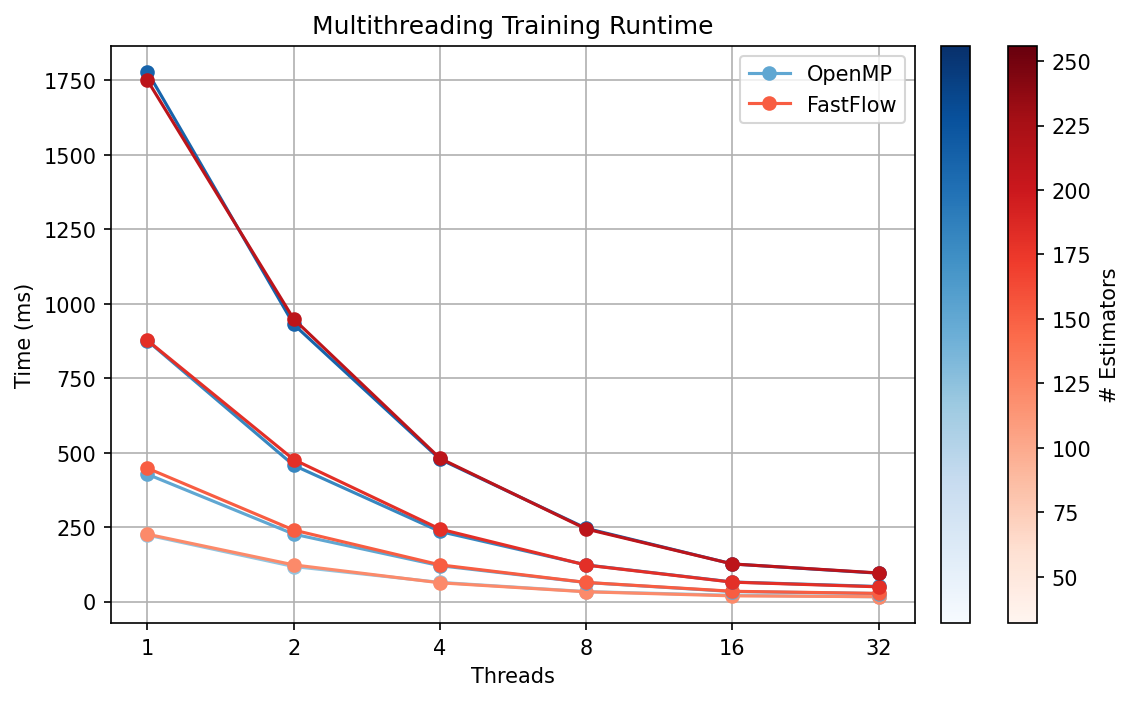

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

omp = df[df["backend"] == "omp"]
ff  = df[df["backend"] == "ff"]

estimators = np.sort(df["estimators"].unique())

fig, ax = plt.subplots(figsize=(8, 5), dpi=150)
ax.set_title("Multithreading Training Runtime")

blues = plt.cm.Blues(np.linspace(0.4, 0.8, len(estimators)))
reds  = plt.cm.Reds (np.linspace(0.4, 0.8, len(estimators)))

for i, e in enumerate(estimators):
    omp_e = omp[omp["estimators"] == e]
    ff_e  = ff [ff ["estimators"] == e]

    ax.plot(
        omp_e["threads"], omp_e["train_time"],
        marker="o", color=blues[i]
    )

    ax.plot(
        ff_e["threads"], ff_e["train_time"],
        marker="o", color=reds[i]
    )

# ----- COLORBAR -----
norm = Normalize(vmin=estimators.min(), vmax=estimators.max())

sm_omp = ScalarMappable(norm=norm, cmap=plt.cm.Blues)
sm_omp.set_array([])

sm_ff = ScalarMappable(norm=norm, cmap=plt.cm.Reds)
sm_ff.set_array([])

cbar_ff = fig.colorbar(sm_ff, ax=ax, fraction=0.035, pad=0.04)
cbar_ff.set_label(r"# Estimators")
# cbar_ff.set_ticks([])

cbar_omp = fig.colorbar(sm_omp, ax=ax, fraction=0.035, pad=0.03)
cbar_omp.set_ticks([])

# ----- AXES -----
ax.set_xscale("log", base=2)
ticks = df["threads"].unique()
ax.set_xticks(ticks)
ax.set_xticklabels([str(t) for t in ticks])

ax.set_xlabel("Threads")
ax.set_ylabel("Time (ms)")
ax.grid()

omp_handle = plt.Line2D([], [], color=blues[1], marker='o', label='OpenMP')
ff_handle  = plt.Line2D([], [], color=reds[1], marker='o', label='FastFlow')
ax.legend(handles=[omp_handle, ff_handle])

plt.show()

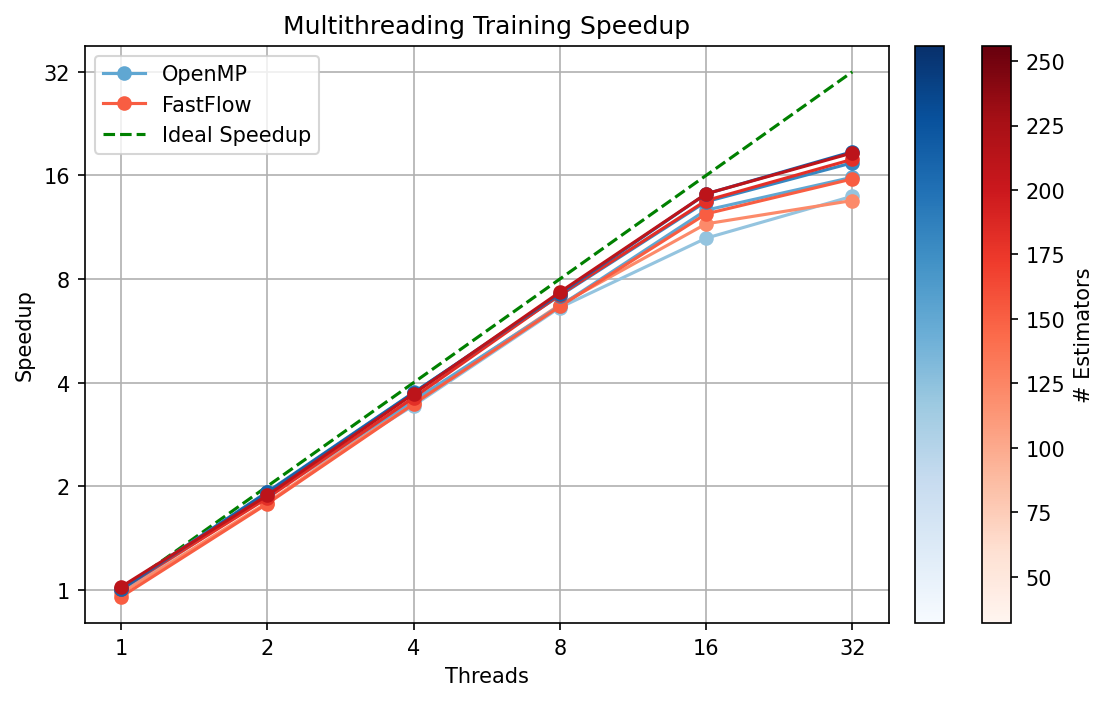

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

omp = df[df["backend"] == "omp"]
ff  = df[df["backend"] == "ff"]

estimators = np.sort(df["estimators"].unique())

fig, ax = plt.subplots(figsize=(8, 5), dpi=150)
ax.set_title("Multithreading Training Speedup")

blues = plt.cm.Blues(np.linspace(0.4, 0.8, len(estimators)))
reds  = plt.cm.Reds (np.linspace(0.4, 0.8, len(estimators)))

ax.plot([1, 32], [1, 32], "g--")

for i, e in enumerate(estimators):
    omp_e = omp[omp["estimators"] == e]
    ff_e  = ff [ff ["estimators"] == e]

    ax.plot(
        omp_e["threads"], omp_e["train_speedup"],
        marker="o", color=blues[i]
    )

    ax.plot(
        ff_e["threads"], ff_e["train_speedup"],
        marker="o", color=reds[i]
    )

# ----- COLORBAR -----
norm = Normalize(vmin=estimators.min(), vmax=estimators.max())

sm_omp = ScalarMappable(norm=norm, cmap=plt.cm.Blues)
sm_omp.set_array([])

sm_ff = ScalarMappable(norm=norm, cmap=plt.cm.Reds)
sm_ff.set_array([])

cbar_ff = fig.colorbar(sm_ff, ax=ax, fraction=0.035, pad=0.04)
cbar_ff.set_label(r"# Estimators")
# cbar_ff.set_ticks([])

cbar_omp = fig.colorbar(sm_omp, ax=ax, fraction=0.035, pad=0.03)
cbar_omp.set_ticks([])

# ----- AXES -----
ax.set_xscale("log", base=2)
ax.set_yscale("log", base=2)
ticks = df["threads"].unique()
ax.set_xticks(ticks)
ax.set_xticklabels([str(t) for t in ticks])
ax.set_yticks(ticks)
ax.set_yticklabels([str(t) for t in ticks])

ax.set_xlabel("Threads")
ax.set_ylabel("Speedup")
ax.grid()

omp_handle = plt.Line2D([], [], color=blues[1], marker='o', label='OpenMP')
ff_handle  = plt.Line2D([], [], color=reds[1], marker='o', label='FastFlow')
ideal_handle  = plt.Line2D([], [], color="green", linestyle='--', label='Ideal Speedup')
ax.legend(handles=[omp_handle, ff_handle, ideal_handle])

plt.show()

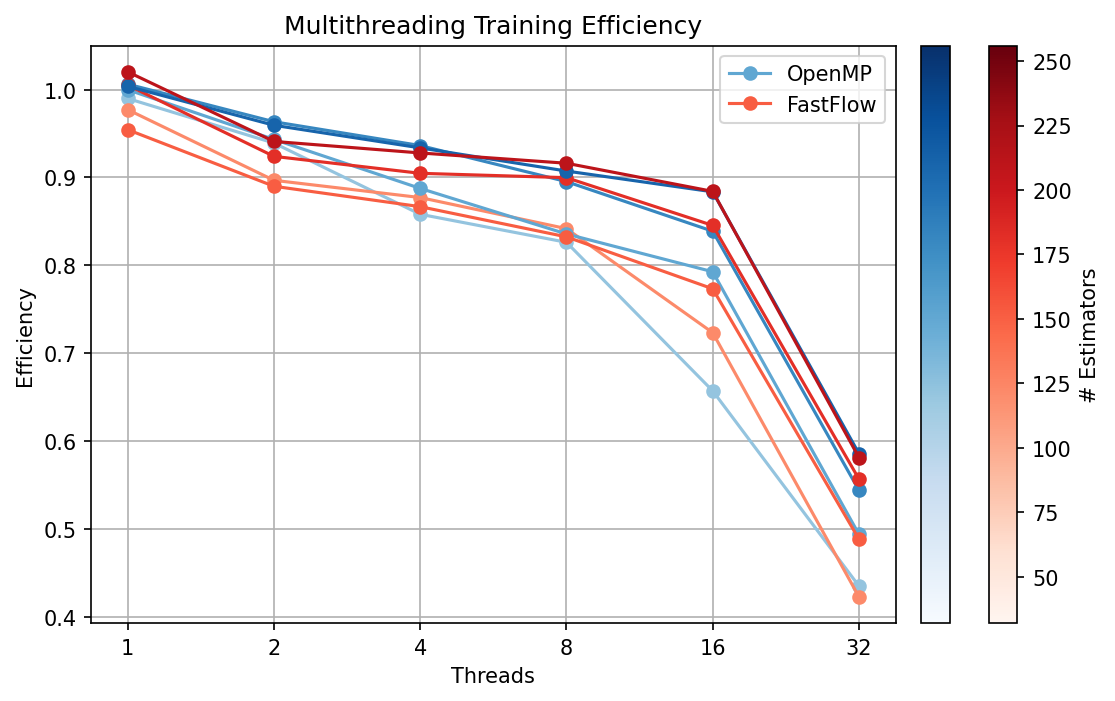

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

omp = df[df["backend"] == "omp"]
ff  = df[df["backend"] == "ff"]

estimators = np.sort(df["estimators"].unique())

fig, ax = plt.subplots(figsize=(8, 5), dpi=150)
ax.set_title("Multithreading Training Efficiency")

blues = plt.cm.Blues(np.linspace(0.4, 0.8, len(estimators)))
reds  = plt.cm.Reds (np.linspace(0.4, 0.8, len(estimators)))

for i, e in enumerate(estimators):
    omp_e = omp[omp["estimators"] == e]
    ff_e  = ff [ff ["estimators"] == e]

    ax.plot(
        omp_e["threads"], omp_e["train_efficiency"],
        marker="o", color=blues[i]
    )

    ax.plot(
        ff_e["threads"], ff_e["train_efficiency"],
        marker="o", color=reds[i]
    )

# ----- COLORBAR -----
norm = Normalize(vmin=estimators.min(), vmax=estimators.max())

sm_omp = ScalarMappable(norm=norm, cmap=plt.cm.Blues)
sm_omp.set_array([])

sm_ff = ScalarMappable(norm=norm, cmap=plt.cm.Reds)
sm_ff.set_array([])

cbar_ff = fig.colorbar(sm_ff, ax=ax, fraction=0.035, pad=0.04)
cbar_ff.set_label(r"# Estimators")
# cbar_ff.set_ticks([])

cbar_omp = fig.colorbar(sm_omp, ax=ax, fraction=0.035, pad=0.03)
cbar_omp.set_ticks([])

# ----- AXES -----
ax.set_xscale("log", base=2)
ticks = df["threads"].unique()
ax.set_xticks(ticks)
ax.set_xticklabels([str(t) for t in ticks])

ax.set_xlabel("Threads")
ax.set_ylabel("Efficiency")
ax.grid()

omp_handle = plt.Line2D([], [], color=blues[1], marker='o', label='OpenMP')
ff_handle  = plt.Line2D([], [], color=reds[1], marker='o', label='FastFlow')
ax.legend(handles=[omp_handle, ff_handle])

plt.show()

In [6]:
mask = ((df["backend"] == "omp") | (df["backend"] == "ff")) & (df["threads"] == 1)
one = df[mask]

keys = ["estimators", "max_depth", "backend", "dataset"]
merged = one.merge(df, how="right", on=keys, suffixes=("_one", "_mt"))

df["train_scalability"] = merged["train_time_one"] / merged["train_time_mt"]

df

,estimators,max_depth,backend,threads,nodes,dataset,train_accuracy,train_f1,test_accuracy,test_f1,train_time,train_predict_time,test_predict_time,train_speedup,train_efficiency,train_scalability
0,32,0,ff,1,1,breast_cancer,1.0,1.0,0.955752,0.948660,226.03020,1.435664,0.721314,0.977209,0.977209,1.000000
1,32,0,ff,2,1,breast_cancer,1.0,1.0,0.955752,0.948660,123.14900,1.111970,0.634200,1.793590,0.896795,1.835421
2,32,0,ff,4,1,breast_cancer,1.0,1.0,0.955752,0.948660,62.95184,1.245160,1.026527,3.508695,0.877174,3.590526
3,32,0,ff,8,1,breast_cancer,1.0,1.0,0.955752,0.948660,32.79872,2.233218,2.122102,6.734373,0.841797,6.891434
4,32,0,ff,16,1,breast_cancer,1.0,1.0,0.955752,0.948660,19.08386,5.266618,5.134266,11.574116,0.723382,11.844050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,256,0,omp,4,1,breast_cancer,1.0,1.0,0.964602,0.958608,477.83000,1.546978,0.423017,3.734839,0.933710,3.720980
144,256,0,omp,8,1,breast_cancer,1.0,1.0,0.964602,0.958608,245.85640,0.971122,0.287621,7.258782,0.907348,7.231848
145,256,0,omp,16,1,breast_cancer,1.0,1.0,0.964602,0.958608,126.21580,0.662846,0.234895,14.139418,0.883714,14.086953
146,256,0,omp,32,1,breast_cancer,1.0,1.0,0.964602,0.958608,95.20178,0.601660,0.226908,18.745637,0.585801,18.676079


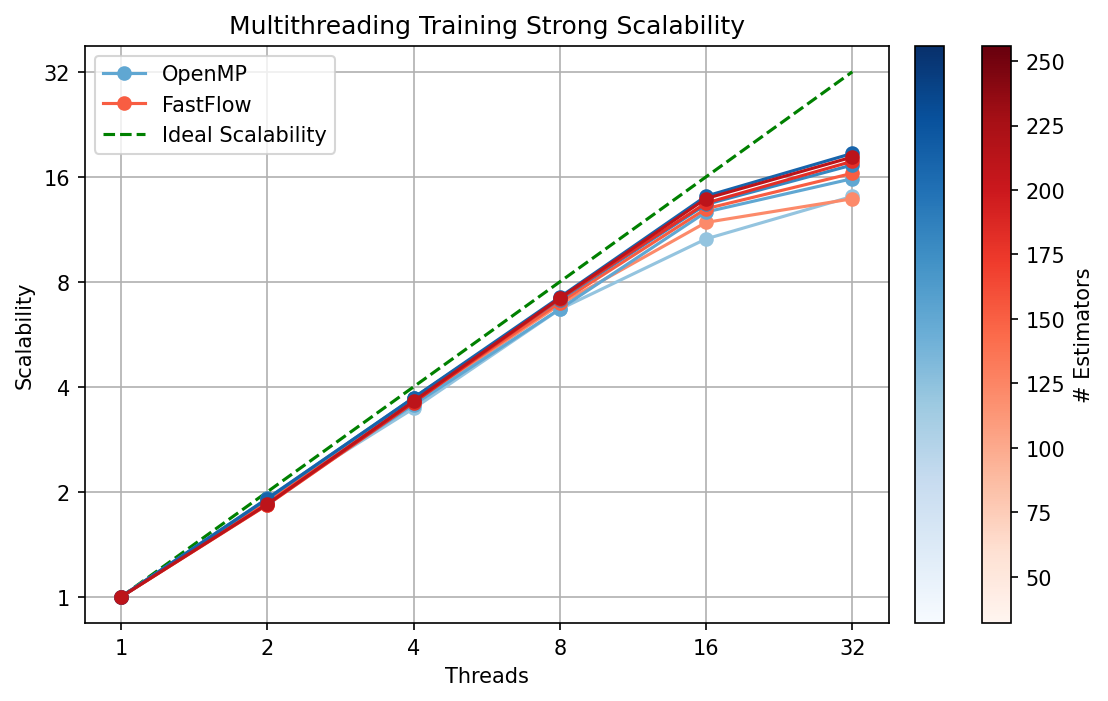

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

omp = df[df["backend"] == "omp"]
ff  = df[df["backend"] == "ff"]

estimators = np.sort(df["estimators"].unique())

fig, ax = plt.subplots(figsize=(8, 5), dpi=150)
ax.set_title("Multithreading Training Strong Scalability")

blues = plt.cm.Blues(np.linspace(0.4, 0.8, len(estimators)))
reds  = plt.cm.Reds (np.linspace(0.4, 0.8, len(estimators)))

ax.plot([1, 32], [1, 32], "g--")

for i, e in enumerate(estimators):
    omp_e = omp[omp["estimators"] == e]
    ff_e  = ff [ff ["estimators"] == e]

    ax.plot(
        omp_e["threads"], omp_e["train_scalability"],
        marker="o", color=blues[i]
    )

    ax.plot(
        ff_e["threads"], ff_e["train_scalability"],
        marker="o", color=reds[i]
    )

# ----- COLORBAR -----
norm = Normalize(vmin=estimators.min(), vmax=estimators.max())

sm_omp = ScalarMappable(norm=norm, cmap=plt.cm.Blues)
sm_omp.set_array([])

sm_ff = ScalarMappable(norm=norm, cmap=plt.cm.Reds)
sm_ff.set_array([])

cbar_ff = fig.colorbar(sm_ff, ax=ax, fraction=0.035, pad=0.04)
cbar_ff.set_label(r"# Estimators")
# cbar_ff.set_ticks([])

cbar_omp = fig.colorbar(sm_omp, ax=ax, fraction=0.035, pad=0.03)
cbar_omp.set_ticks([])

# ----- AXES -----
ax.set_xscale("log", base=2)
ax.set_yscale("log", base=2)
ticks = df["threads"].unique()
ax.set_xticks(ticks)
ax.set_xticklabels([str(t) for t in ticks])
ax.set_yticks(ticks)
ax.set_yticklabels([str(t) for t in ticks])

ax.set_xlabel("Threads")
ax.set_ylabel("Scalability")
ax.grid()

omp_handle = plt.Line2D([], [], color=blues[1], marker='o', label='OpenMP')
ff_handle  = plt.Line2D([], [], color=reds[1], marker='o', label='FastFlow')
ideal_handle  = plt.Line2D([], [], color="green", linestyle='--', label='Ideal Scalability')
ax.legend(handles=[omp_handle, ff_handle, ideal_handle])

plt.show()